

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description 
> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. 

> ● A number of
characteristics about the patient are
included in each row.

> ● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

> ● ‘Neighborhood’ indicates the
location of the hospital.

> ● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

> ● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


### Question(s) for Analysis :-
> What are the factors that affect the attendaance of patients ?

In [4]:
# set up import statements for all of the packages that i plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. Make sure that I document my data cleaning steps in mark-down cells precisely and justify my cleaning decisions.


### General Properties
> I won't  perform too many operations in each cell. 

> I wil Create cells freely to explore my data.

> One option that I can take with this project is to do a lot of explorations in an initial notebook.

> I will make sure to use enough comments to understand the purpose of each code cell. 

> I will create a duplicate notebook where I will trim the excess and organize my steps for final report.

In [5]:
# I will Load my data and print out a few lines. Perform operations to inspect data types.
# I will look for instances of missing or possibly errant data.
df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Columns name : Hipertension and No-show need to correct.

In [6]:
# Chech the shape of data.
df.shape

(110527, 14)

Nice my data consist of 110527 appointments and 14 factors.

In [7]:
# Check for duplicate rows.
df.duplicated().sum()

0

Awesome there isn't duplicated.

In [8]:
# Chech the number of unique values.
df["PatientId"].nunique()

62299

there are 62299 of 110527 consider unique values.

In [9]:
# Check the number of duplicated patients IDs.
df["PatientId"].duplicated().sum()

48228

here I find 48228 duplicated patients IDs. 

So I will check the number of duplicated patients IDs with no show,

to see if there are patients IDs duplicated but deffer in no show .

In [10]:
df.duplicated(["PatientId", "No-show"]).sum()

38710

I can see 38710 duplicated patients IDs with no show.

I will process them all with cleaning.

In [11]:
# Check for missing values or other issues.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Awesome there arn't missing values.

In [12]:
# describe my data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The majority doesn't have chronic diseases.

The majority aren't addicted to alcohol.

The majority aren't in scholarship.

The majority arn't disabled.

I will focus on Age.

In [13]:
df["Age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The minimum age here is (-1) it's unbelievable value, single value, and it was a mistake.

So I will remove it.

In [14]:
df.query("Age==-1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Data Cleaning
> After discussing the structure of the data and any problems.

> I will clean and perform those cleaning steps.

### General Properties :- 
> I will be sure to keep my reader informed on the steps that i will take in my investigation.

> I will Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). 

> So that the reader can then understand what they will be seeing in the following cell(s).
 

In [15]:
# remove the minimum age value (-1)
df.drop(index=99832, inplace=True)

In [16]:
# So describe to see result
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Done

In [17]:
# Correct the columns name that I mentioned in the previous section.
df.rename(columns={"Hipertension":"Hypertension"}, inplace=True)
df.rename(columns={"No-show":"No_show"}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Done

In [18]:
# Clean the 38710 duplicated patients with no show that I mentioned in the previous section.
df.drop_duplicates(["PatientId", "No_show"], inplace=True)
df.shape

(71816, 14)

Done

In [19]:
# clean unnecessary data.
df.drop(["ScheduledDay", "AppointmentID", "PatientId", "AppointmentDay"], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Done

##  Data wrangling summary:
> First I loaded my data and print out a few lines, Perform operations to inspect data types and looked for instances of missing data.

> Then I checked the shape, duplicate rows, unique values, duplicated patients IDs, missing values or other issues and described my data

>Finally I cleaned my data by remove mistake  values, correct the columns name, Clean duplicated and clean unnecessary data.

<a id='eda'></a>
## Exploratory Data Analysis

> Now that Ihave trimmed and cleaned my data, I'm ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that I posed in the Introduction section. I will compute the relevant statistics throughout the analysis when an inference is made about the data. At least two or more kinds of plots I will created as part of the exploration, and I will  compare and show trends in the varied visualizations. 



> I will investigate the stated question from multiple angles. I will be systematic with your approach. I will Look at one variable at a time, and then follow it up by looking at relationships between variables. I will explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, I will perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question  (What are the factors that effect the attendaance of patients ?)

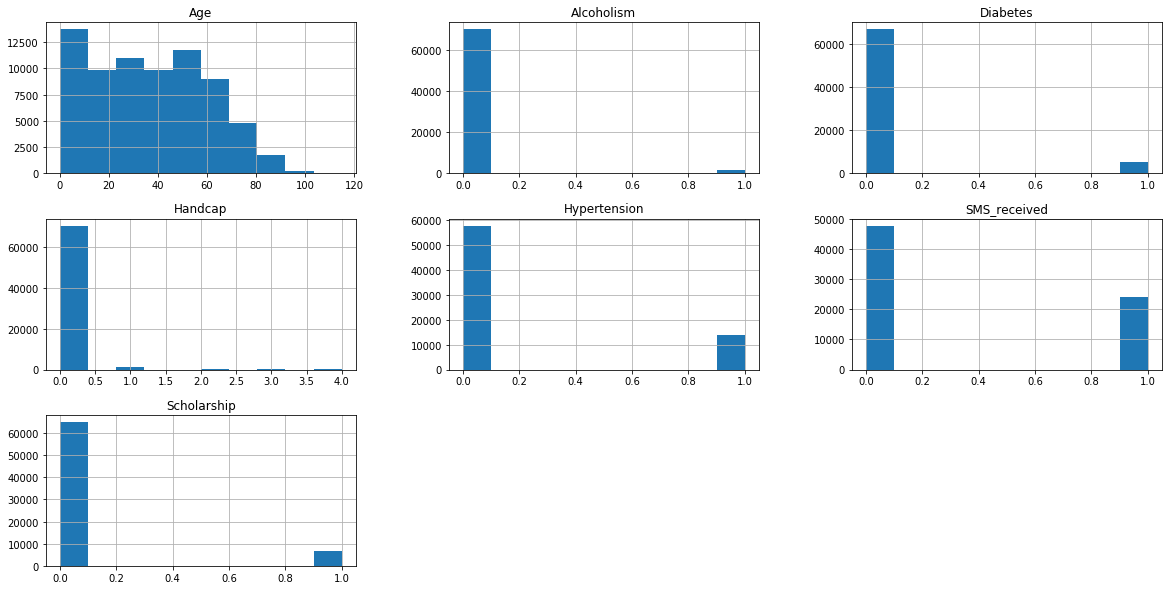

In [20]:
# see my data histograms.
df.hist(figsize=(20, 10));

Nice as described it in the previous section.

I will explore deeper to answer my question .

In [21]:
# I need to know the attend and  noattend as apart of my question.
attend = df.No_show == "No"
noattend = df.No_show == "Yes"
df[attend].count(), df[noattend].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

Number of attended is : 54153 & Number of absent is : 17663 

In [22]:
# the mean of attend and no attend.
df[attend].mean(), df[noattend].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

The number of attended patients who received SMS less than the number of absent patients who received SMS.

So we must revise our SMS campaign.

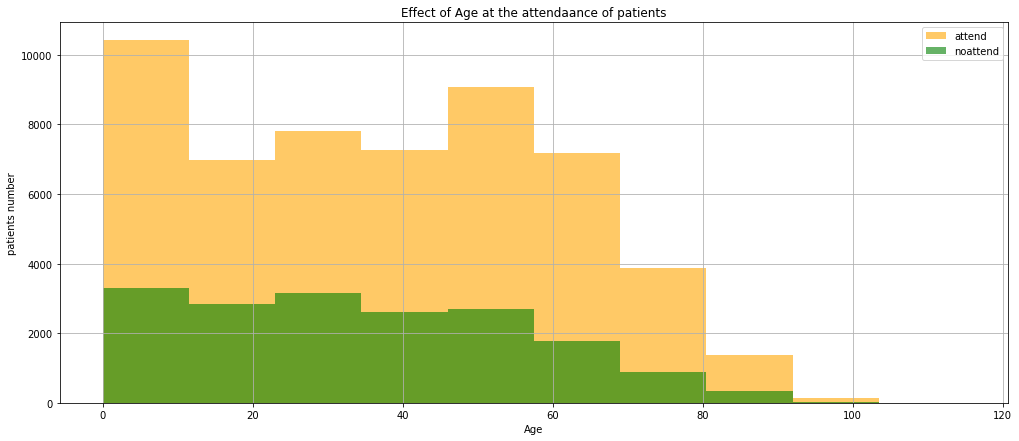

In [23]:
# The effect of Age at the attendaance of patients.
def attendance(df, col_name, attended, absent):
    
    plt.figure(figsize=[17, 7])
    df[col_name][attend].hist(alpha=.6, bins=10, color="orange", label="attend")
    df[col_name][noattend].hist(alpha=.6, bins=10, color="green", label="noattend")
    plt.legend()
    plt.title("Effect of Age at the attendaance of patients")
    plt.xlabel("Age")
    plt.ylabel("patients number");
attendance(df, "Age", attend, noattend)

The most showing of ages are from 0 to 8 after that the ages from 45 to 55 and the least attendance above 65 .

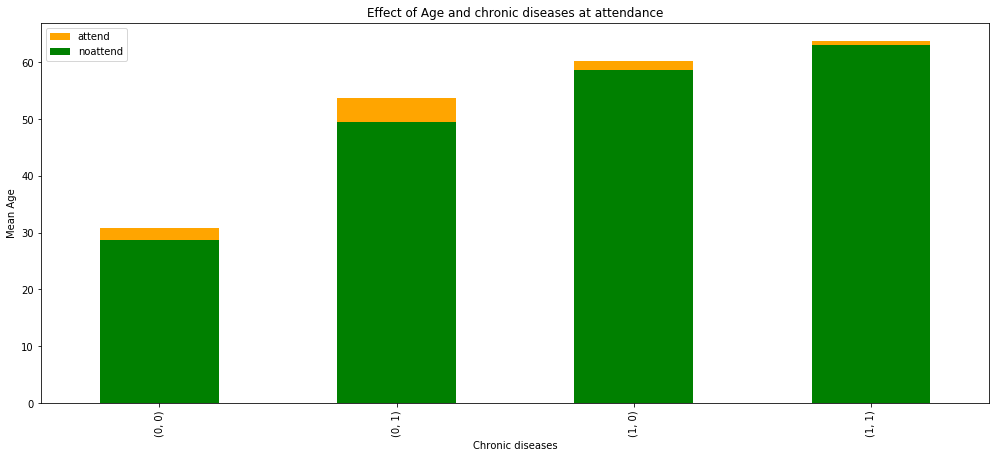

In [24]:
# The effect of Age and chronic diseases at attendance.
plt.figure(figsize=[17, 7])
df[attend].groupby(["Hypertension", "Diabetes"]).mean()["Age"].plot(kind="bar", color="orange", label="attend")
df[noattend].groupby(["Hypertension", "Diabetes"]).mean()["Age"].plot(kind="bar", color="green", label="noattend")
plt.legend();
plt.title("Effect of Age and chronic diseases at attendance")
plt.xlabel("Chronic diseases")
plt.ylabel("Mean Age");

In [25]:
df[attend].groupby(["Hypertension", "Diabetes"]).mean()["Age"],df[noattend].groupby(["Hypertension", "Diabetes"]).mean()["Age"]

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

There is a correlation between age and chronic diseases .

There isn't a correlation between chronic diseases and attendance .

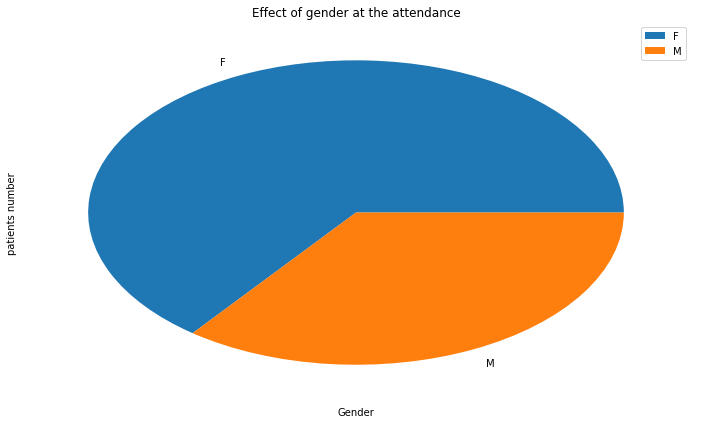

In [26]:
# The effect of gender at the attendance .
def attendance(df, col_name, attended, absent):
    plt.figure(figsize=[12, 7])
    df[col_name][attend].value_counts(normalize=True).plot(kind="pie", label="attend")
    plt.legend()
    plt.title("Effect of gender at the attendance")
    plt.xlabel("Gender")
    plt.ylabel("patients number")
attendance(df, "Gender", attend, noattend)

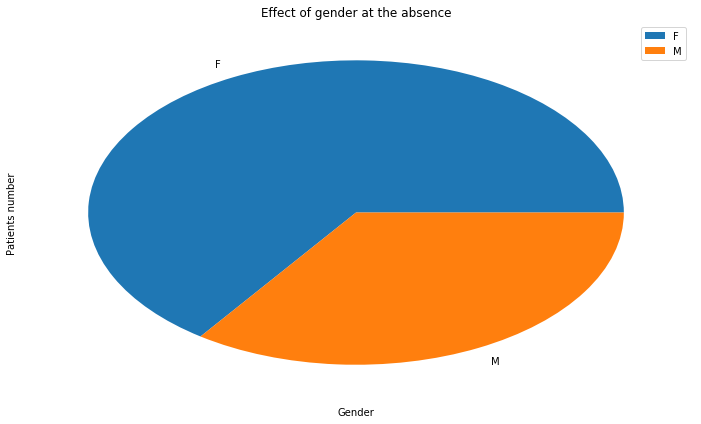

In [27]:
# The effect of gender at the absence .
def absence(df, col_name, attended, absent):
    plt.figure(figsize=[12, 7])
    df[col_name][noattend].value_counts(normalize=True).plot(kind="pie", label="show")
    plt.legend()
    plt.title("Effect of gender at the absence")
    plt.xlabel("Gender")
    plt.ylabel("Patients number")
absence(df, "Gender", attend, noattend)

Gender hasn't Clear effect on the attendance.

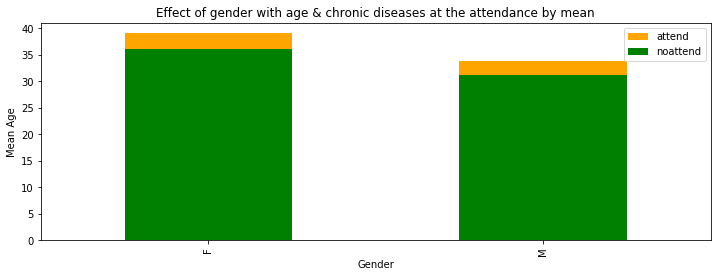

In [28]:
# The effect of gender with age & chronic diseases at the attendance by mean .
plt.figure(figsize=[12, 4])
df[attend].groupby("Gender").Age.mean().plot(kind="bar", color="orange", label="attend")
df[noattend].groupby("Gender").Age.mean().plot(kind="bar", color="green", label="noattend")
plt.legend()
plt.title("Effect of gender with age & chronic diseases at the attendance by mean")
plt.xlabel("Gender")
plt.ylabel("Mean Age");

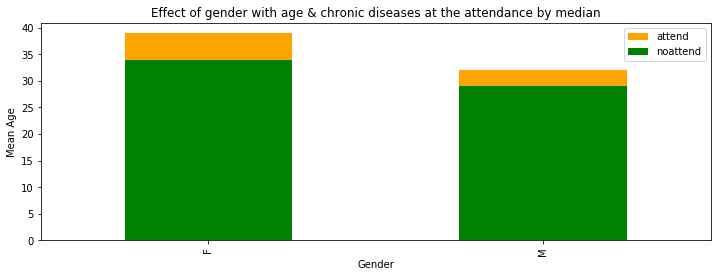

In [29]:
# The effect of gender with age & chronic diseases at the attendance by median.
plt.figure(figsize=[12, 4])
df[attend].groupby("Gender").Age.median().plot(kind="bar", color="orange", label="attend")
df[noattend].groupby("Gender").Age.median().plot(kind="bar", color="green", label="noattend")
plt.legend()
plt.title("Effect of gender with age & chronic diseases at the attendance by median")
plt.xlabel("Gender")
plt.ylabel("Mean Age");

In [30]:
print(df[attend].groupby("Gender").Age.mean(), df[noattend].groupby("Gender").Age.mean(),
      df[attend].groupby("Gender").Age.median(), df[noattend].groupby("Gender").Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39
M    32
Name: Age, dtype: int64 Gender
F    34
M    29
Name: Age, dtype: int64


There is no clear affected of gender with age & chronic diseases at the attendance by mean or median.

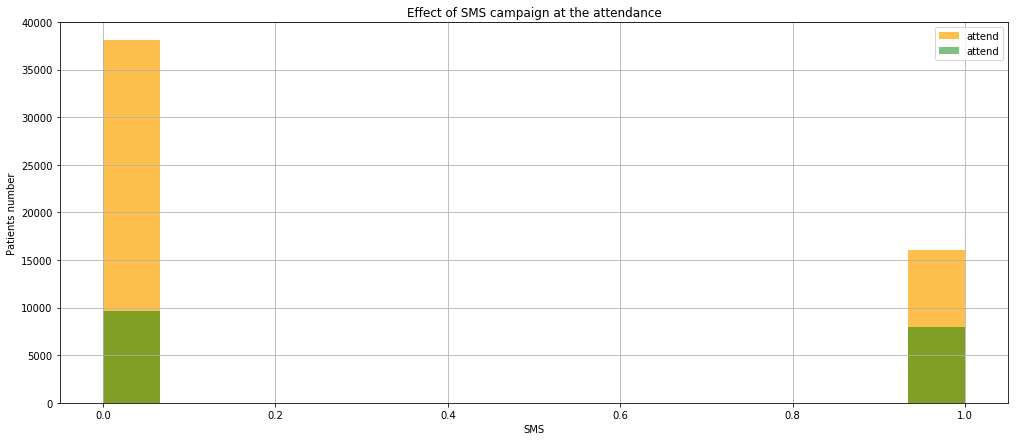

In [31]:
# The effect of SMS campaign at the attendance.
def attendance(df, col_name, attended, absent):
    plt.figure(figsize=[17, 7])
    df[col_name][attend].hist(alpha=.7, bins=15, color="orange", label="attend")
    df[col_name][noattend].hist(alpha=.5, bins=15, color="green", label="attend")
    plt.legend()
    plt.title("Effect of SMS campaign at the attendance")
    plt.xlabel("SMS")
    plt.ylabel("Patients number");
attendance(df, "SMS_received", attend, noattend)

Our SMS campaign need to be evaluated since there are more showing patients without SMS than showing patients with SMS .

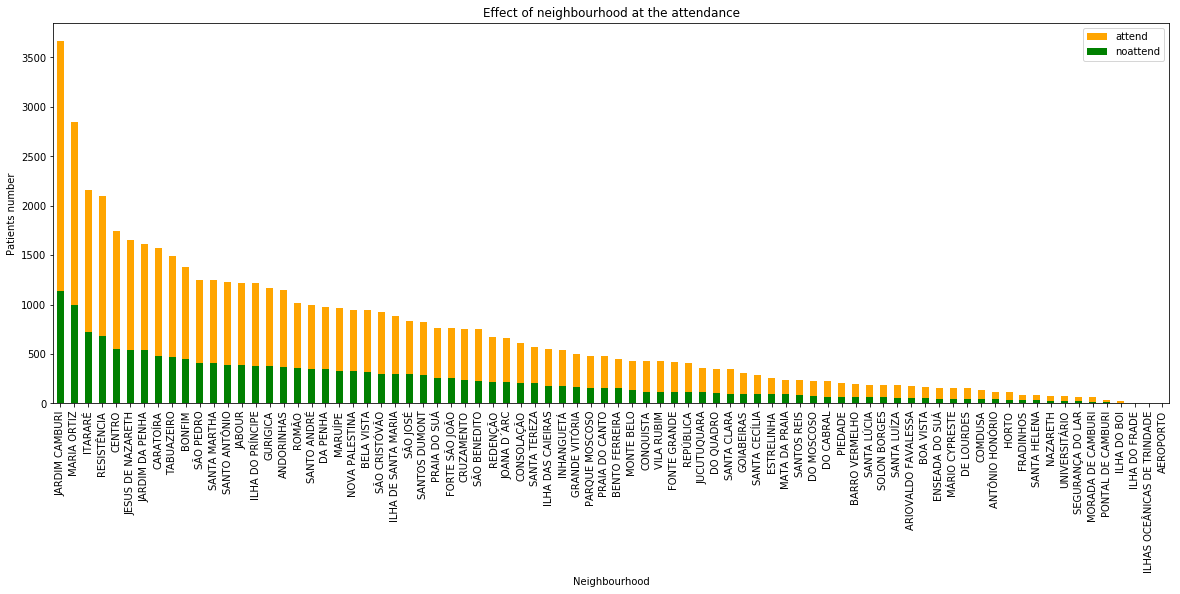

In [32]:
# The effect of neighbourhood at the attendance.
plt.figure(figsize=[20, 7])
df.Neighbourhood[attend].value_counts().plot(kind="bar", color="orange", label="attend")
df.Neighbourhood[noattend].value_counts().plot(kind="bar", color="green", label="noattend")
plt.legend()
plt.title("Effect of neighbourhood at the attendance")
plt.xlabel("Neighbourhood")
plt.ylabel("Patients number");

I see the neighbourhood affected on the attendance.

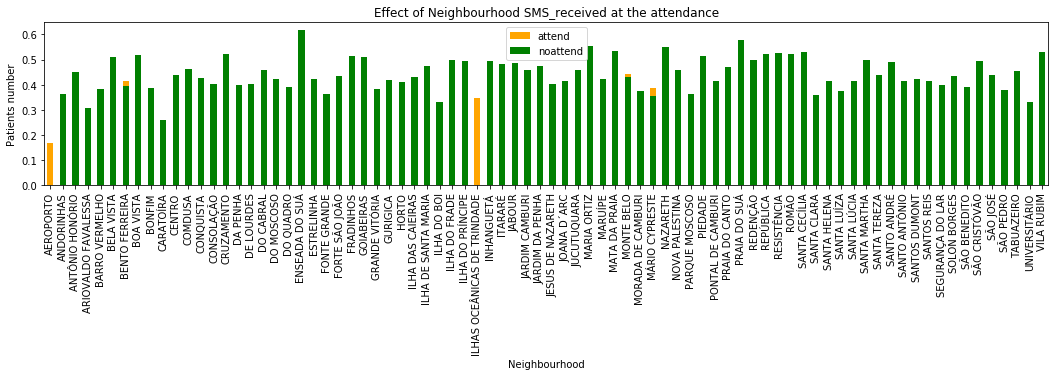

In [33]:
# The effect of Neighbourhood SMS_received at the attendance.
plt.figure(figsize=[18, 3])
df[attend].groupby("Neighbourhood").SMS_received.mean().plot(kind="bar", color="orange", label="attend")
df[noattend].groupby("Neighbourhood").SMS_received.mean().plot(kind="bar", color="green", label=("noattend"))
plt.legend()
plt.title("Effect of Neighbourhood SMS_received at the attendance")
plt.xlabel("Neighbourhood")
plt.ylabel("Patients number");

The effect of Neighbourhood SMS_received at the attendance in only five neighbourhood 

IL HAS OCEANICAS DE TRINADE is the most responsive to SMS.

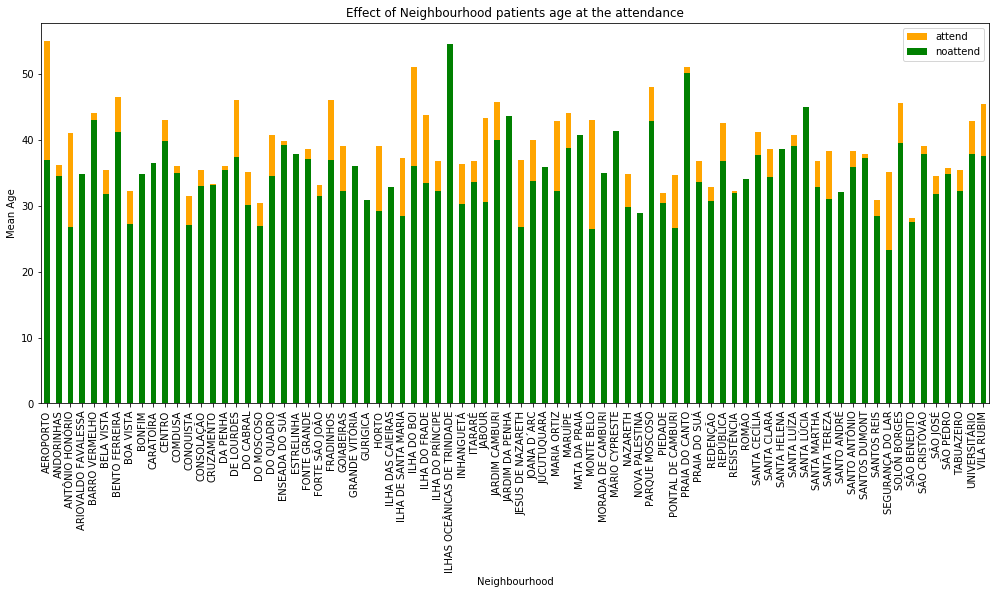

In [39]:
# The effect of Neighbourhood patients age at the attendance.
plt.figure(figsize=[17, 7])
df[attend].groupby("Neighbourhood").Age.mean().plot(kind="bar", color="orange", label="attend")
df[noattend].groupby("Neighbourhood").Age.mean().plot(kind="bar", color="green", label="noattend")
plt.legend()
plt.title("Effect of Neighbourhood patients age at the attendance")
plt.xlabel("Neighbourhood")
plt.ylabel("Mean Age");

There are different attended from Neighbourhood to other.

There are Neighbourhood where the average age is large but no one came from them.

AEROPORTO then ILHADOBOI are with high ages attendance . 

<a id='conclusions'></a>
## Conclusions

> The number of attended patients who received SMS less than the number of absent patients who received SMS.
So we must revise our SMS campaign.

> The most showing of ages are from 0 to 8 after that the ages from 45 to 55 and the least attendance above 65 .

> There is a correlation between age and chronic diseases .
There isn't a correlation between chronic diseases and attendance .

> Gender hasn't Clear effect on the attendance.

> There is no clear affected of gender with age & chronic diseases at the attendance by mean or median.

> Our SMS campaign need to be evaluated since there are more showing patients without SMS than showing patients with SMS .

> I see the neighbourhood affected on the attendance.

> The effect of Neighbourhood SMS_received at the attendance in only five neighbourhood

> IL HAS OCEANICAS DE TRINADE is the most responsive to SMS.

> There are different attended from Neighbourhood to other.

> There are Neighbourhood where the average age is large but no one came from them.

> AEROPORTO then ILHADOBOI are with high ages attendance .

# Limitations
    No clear correlation exists between showing and gender, chronic diseases, or welfare program enrollment.

In [41]:
from subprocess import call
call(["python", "-m", "nbconvert", "Investigate_a_Dataset.ipynb"])

0